In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
!git clone https://github.com/mlohaus/SearchFair

fatal: destination path 'SearchFair' already exists and is not an empty directory.


In [4]:
data = pd.read_csv('SearchFair/data/adult/adult.csv')
data.columns = ["age", "workclass", "fnlwgt", "education", "educational-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
print("length of <=50k", len(data[data["income"].str.contains("<=50K")]))
print("length of >50k", len(data[data["income"].str.contains(">50K")]))

length of <=50k 37155
length of >50k 11687


In [6]:
def plotbargraph(data, column):
  ax = data[column].value_counts().plot(kind='bar',label='index',color=['C0', 'C1', 'C2', 'C3', 'C4'])
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

  x = ax

  # Despine
  x.spines['right'].set_visible(False)
  x.spines['top'].set_visible(False)
  x.spines['left'].set_visible(False)

  # Switch off ticks
  x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = x.get_yticks()
  for tick in vals:
      x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Remove title
  x.set_title(column + " distribution", weight='bold', size=12)

  # Set x-axis label
  x.set_xlabel("label", labelpad=20, size=12)

  # Set y-axis label
  x.set_ylabel("count", labelpad=20, size=12)

  # Format y-axis label
  x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

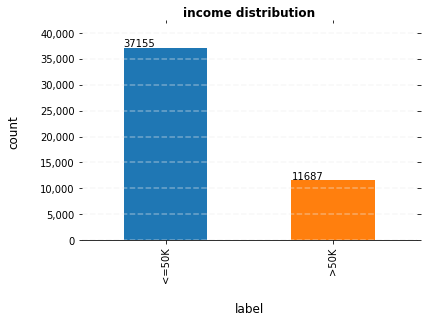

In [7]:
plotbargraph(data, 'income')

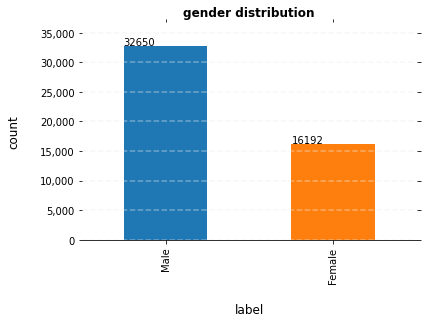

In [8]:
plotbargraph(data,'gender')

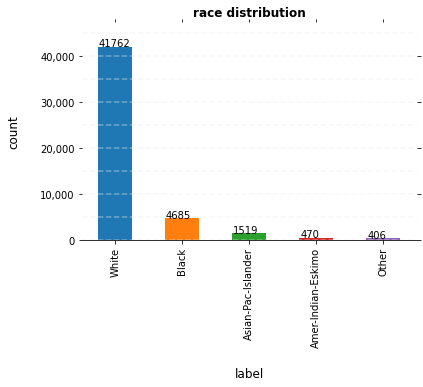

In [9]:
plotbargraph(data, 'race')

In [10]:
data50plus = data[data["income"].str.contains("50K")].iloc[:7841]
data50plus

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,26,Private,48718,10th,6,Never-married,Adm-clerical,Not-in-family,White,Female,2907,0,40,United-States,<=50K
7837,45,Private,106113,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
7839,33,?,202498,7th-8th,4,Separated,?,Not-in-family,White,Male,0,0,40,Guatemala,<=50K


In [11]:
data50minus = data[data["income"].str.contains("<=50K")].iloc[:7841]
data50minus

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,55,Private,202559,Bachelors,13,Married-civ-spouse,Other-service,Other-relative,Asian-Pac-Islander,Male,0,0,35,Philippines,<=50K
10277,25,Private,123095,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,1590,40,United-States,<=50K
10278,32,Private,153326,Bachelors,13,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,40,United-States,<=50K
10279,28,Private,75695,Some-college,10,Separated,Other-service,Not-in-family,White,Female,0,0,60,United-States,<=50K


In [12]:
databalanced = pd.concat([data50minus, data50plus])
databalanced = databalanced.sample(frac=1).reset_index(drop=True)
databalanced

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,34,Private,225548,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,30,United-States,<=50K
1,26,Private,109186,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Germany,<=50K
2,31,State-gov,151763,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,25,United-States,<=50K
3,51,Private,182187,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,35,United-States,<=50K
4,46,Private,384795,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,37,Federal-gov,196348,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
15678,49,Self-emp-not-inc,117634,Some-college,10,Widowed,Craft-repair,Unmarried,White,Female,0,0,30,United-States,<=50K
15679,45,Private,304570,12th,8,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,40,?,<=50K
15680,55,Private,354923,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


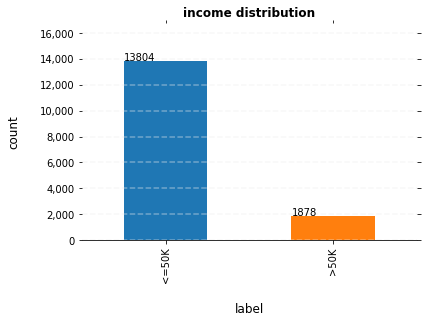

In [13]:
plotbargraph(databalanced, 'income')

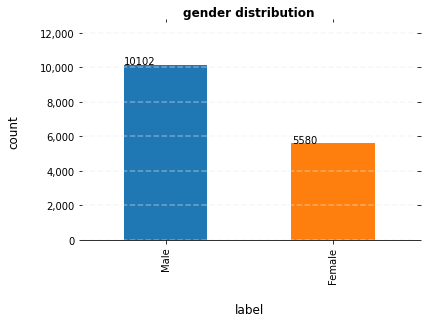

In [14]:
plotbargraph(databalanced, 'gender')

In [15]:
def balancedataset(data):
  data50minus = data[data["income"].str.contains("<=50K")].iloc[:7841]
  data50plus = data[data["income"].str.contains(">50K")].iloc[:7841]
  databalanced = pd.concat([data50minus, data50plus])
  databalanced = databalanced.sample(frac=1).reset_index(drop=True)
  return databalanced